In [1]:
import numpy as np

In [2]:
# Stirling numbers of second kind
S = [[0 for i in range(1001)] for j in range(1001)]

# Combinations
C = [[0 for i in range(1001)] for j in range(1001)]

In [198]:
from scipy.special import factorial
from decimal import Decimal
import decimal
import math

def stirling(n,k,S):
    if S[n][k] > 0: return S[n][k]
    if k>n or k==0 or n==0: return 0
    if k==1 or k==n:
        S[n][k]=1
    else:
        S[n][k] = Decimal(stirling(n-1,k-1,S) + k*stirling(n-1,k,S))
    return S[n][k]

def combs(n,k,C,S):
    if C[n][k] > 0: return C[n][k]
    if k>n or k==0 or n==0: return 0
    c = Decimal(math.factorial(n)) / Decimal(math.factorial(n-k))
    C[n][k] = Decimal(c*stirling(n,k,S))
    return C[n][k]

def H(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(C[n][k] * Decimal((z**k)))
    return h

# Denominator in Expected no. of colors
def H_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(k * C[n][k] * Decimal((z**k)))
    return h

# Denominator in Expected no. of colors squared
def H_t_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal((k**2) * C[n][k] * Decimal((z**k)))
    return h

def E_cols(n,z,C):
    return Decimal(H_t(n,z,C)/H(n,z,C))

def Var_cols(n,z,C):
    EX_2 = Decimal(H_t_t(n,z,C)/H(n,z,C))
    v = Decimal(EX_2 - (E_cols(n,z,C)**2))
    if v < 0:
        # print("Negative variance in",n,z,C)
        v = 0
    return v

def std_cols(n,z,C):
    return float(Var_cols(n,z,C))**(0.5)

In [199]:
float(Decimal(math.factorial(1000))/Decimal(math.factorial(190)))

inf

In [200]:
for i in range(1001):
    if i%100==0: print(i)
    for j in range(1001):
        stirling(i,j,S)
        combs(i,j,C,S)

0
100
200
300
400
500
600
700
800
900
1000


In [201]:
print("C(4,2):", C[4][2]) #84
print("C(4,.):", C[4][:10])
print ("sum of C(4,.):", sum(C[4]))
print ("H(4,1):", H(4,1,C))
print ("H_t(4,1):", H_t(4,1,C))
print ("H_t_t(4,1):", H_t_t(4,1,C))
print ("E_cols(4,1):", E_cols(4,1,C))
print ("Var_cols(4,1):", Var_cols(4,1,C))
print ("std_cols(4,1):", std_cols(4,1,C))

C(4,2): 84
C(4,.): [0, 4, 84, 144, 24, 0, 0, 0, 0, 0]
sum of C(4,.): 256
H(4,1): 256
H_t(4,1): 700
H_t_t(4,1): 2020
E_cols(4,1): 2.734375
Var_cols(4,1): 0.413818359375
std_cols(4,1): 0.6432871515699656


In [208]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_expected_colors (N):
    max_gamma = 100
    z = [np.e**(-gamma) for gamma in range(max_gamma)]
    print(z)
    y = [E_cols(N,zz,C) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.plot(range(max_gamma), y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Expected num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_std_colors (N):
    max_gamma = 200
    gammas = np.linspace(0, max_gamma, num=max_gamma, endpoint=False)
    z = [np.e**(-gamma) for gamma in gammas]
    y = [std_cols(N,zz,C) for zz in z]
    peaks, _ = find_peaks(y, height=0.1)
    print(N, peaks)
    pk_gammas = [gammas[pk] for pk in peaks]
    print(pk_gammas/pk_gammas[-1])
    print()
    f = plt.figure(figsize=(18, 5))
    plt.plot(gammas, y, "-ok")
    plt.plot(peaks, [y[pk] for pk in peaks], "|", c="red", ms=20)
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Std. num. colors")
    plt.title(str(N) + " total sites / colors")
#     plt.savefig("Expected_no_colors/std_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_avg_std_colors (N):
    max_gamma = 100
    gammas = np.linspace(0, max_gamma, num=100)
    z = [np.e**(-gamma) for gamma in gammas]
    y = [E_cols(N,zz,C) for zz in z]
    yerr = [np.real(std_cols(N,zz,C)) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.errorbar(gammas, y, yerr=yerr, marker='o', color='black', capsize=3)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Expected num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    plt.savefig("Expected_no_colors/avg_std_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()

16 [13]
[1.]



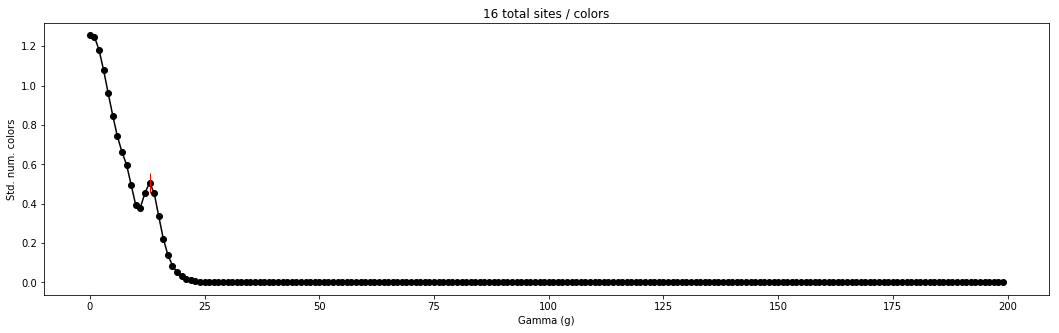

25 [12 20]
[0.6 1. ]



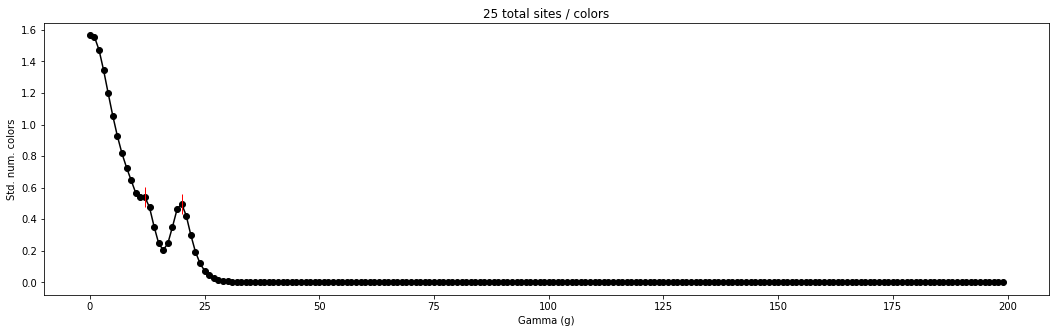

36 [17 28]
[0.60714286 1.        ]



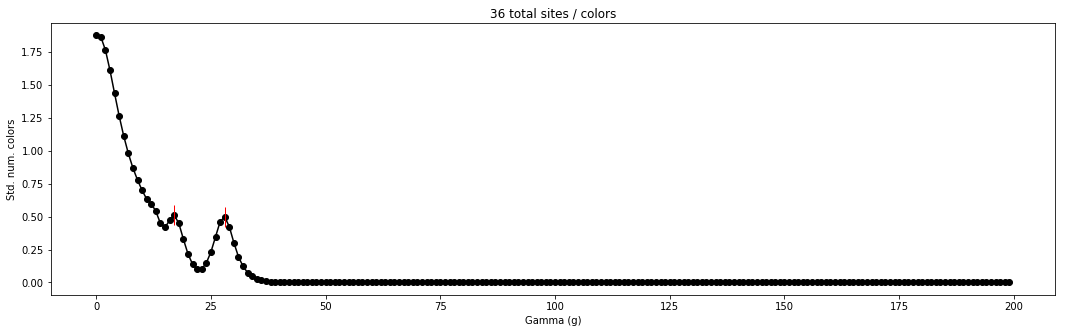

49 [16 23 37]
[0.43243243 0.62162162 1.        ]



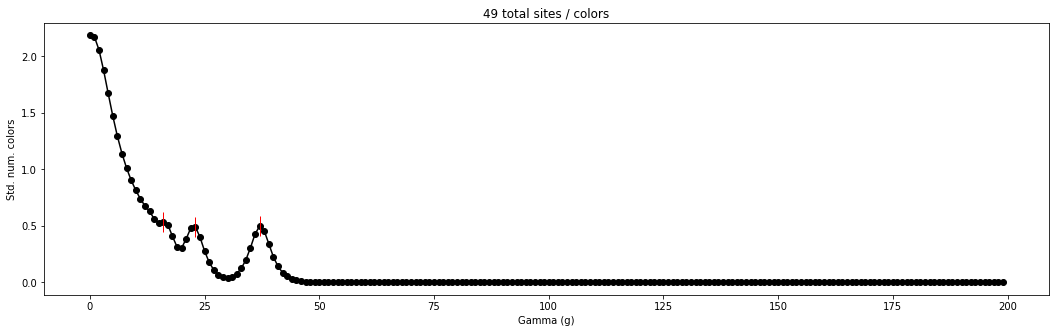

64 [21 29 48]
[0.4375     0.60416667 1.        ]



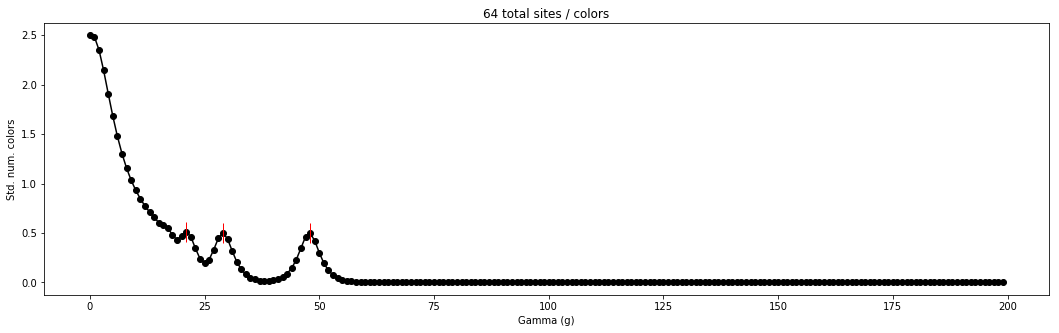

81 [20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]



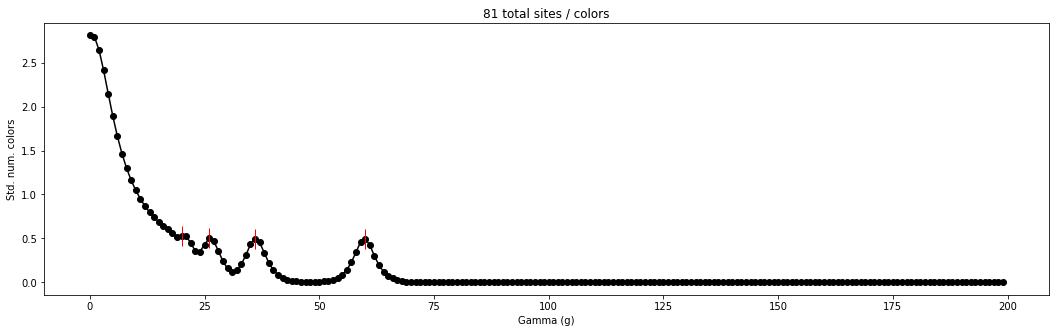

100 [25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]



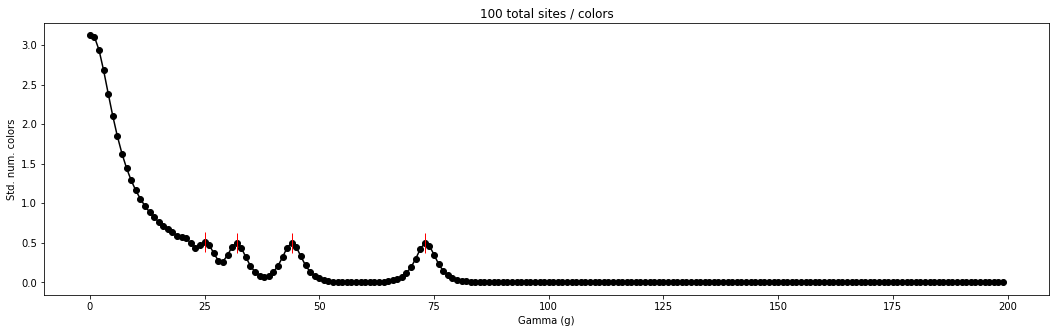

121 [25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



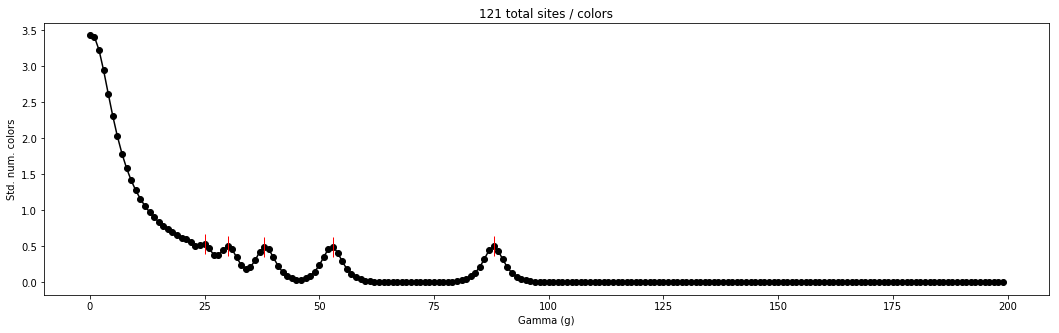

144 [ 25  29  35  45  62 104]
[0.24038462 0.27884615 0.33653846 0.43269231 0.59615385 1.        ]



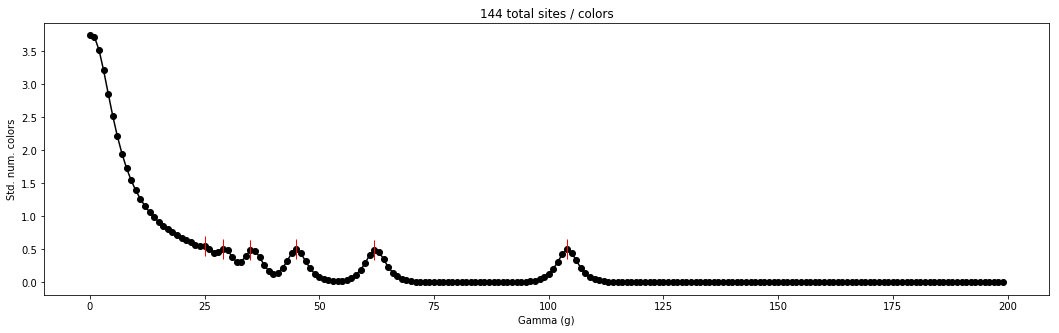

200 [ 30  34  40  48  61  85 143]
[0.20979021 0.23776224 0.27972028 0.33566434 0.42657343 0.59440559
 1.        ]



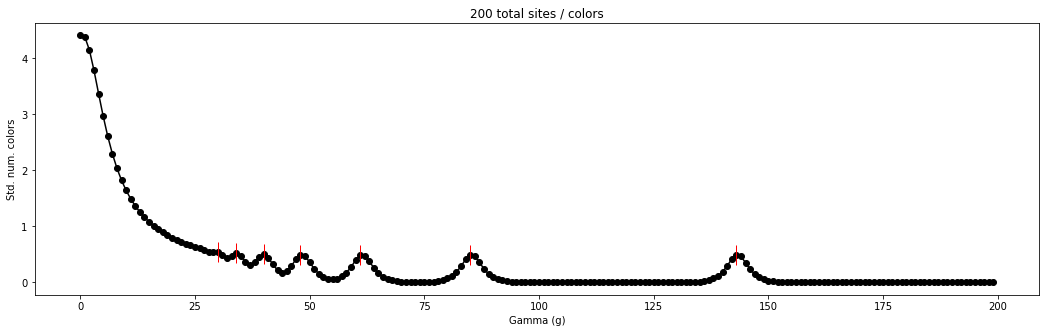

In [209]:
plot_std_colors(16)
plot_std_colors(25)
plot_std_colors(36)
plot_std_colors(49)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plot_std_colors(144)
plot_std_colors(200)
# plt.show()

300 [ 35  39  44  50  59  71  91 126]
[0.27777778 0.30952381 0.34920635 0.3968254  0.46825397 0.56349206
 0.72222222 1.        ]



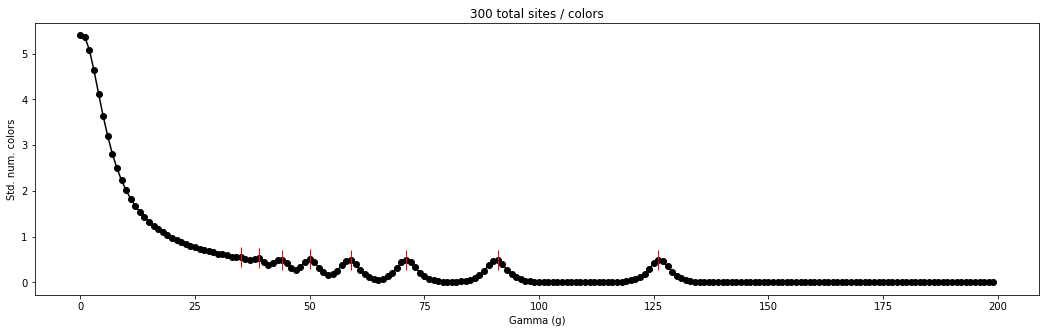

In [210]:
plot_std_colors(300)

[17 28]
[0.60714286 1.        ]

[21 29 48]
[0.4375     0.60416667 1.        ]

[20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]

[25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]

[25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



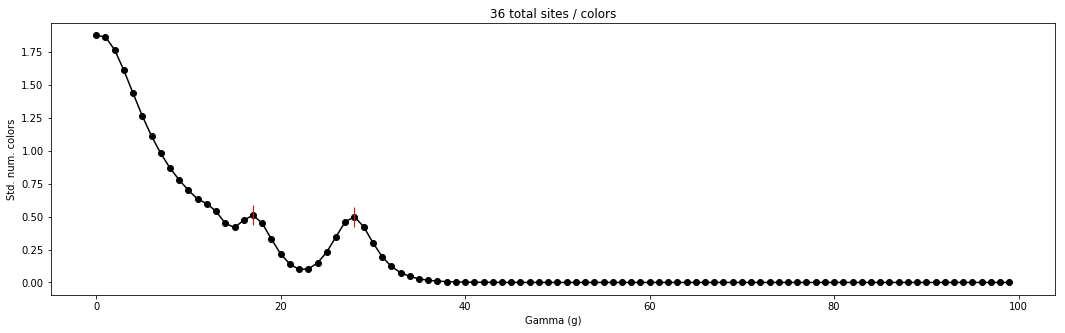

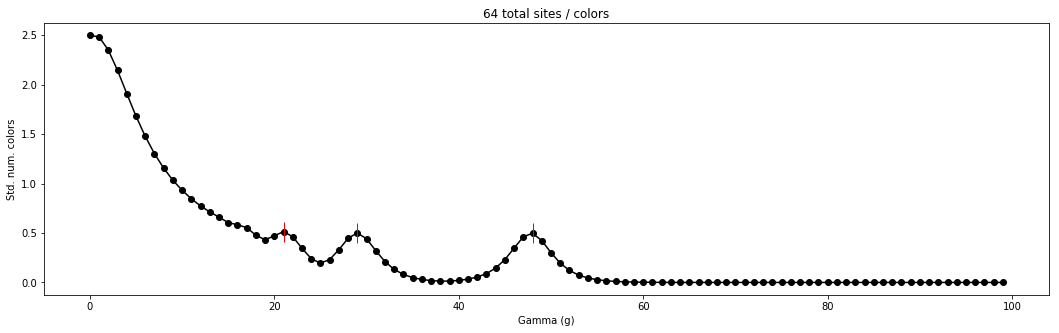

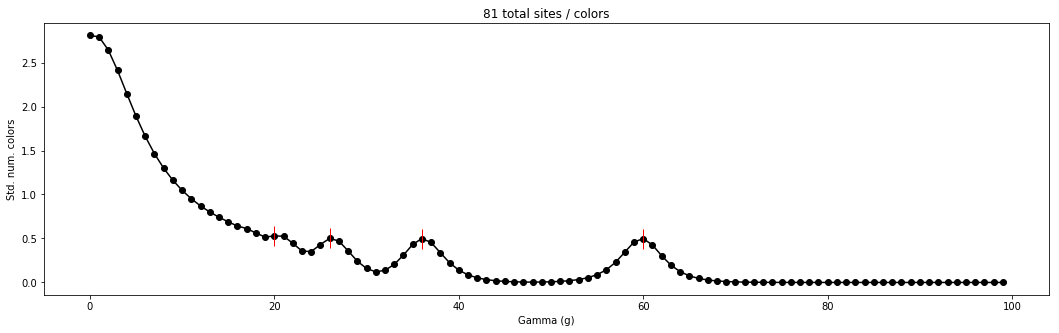

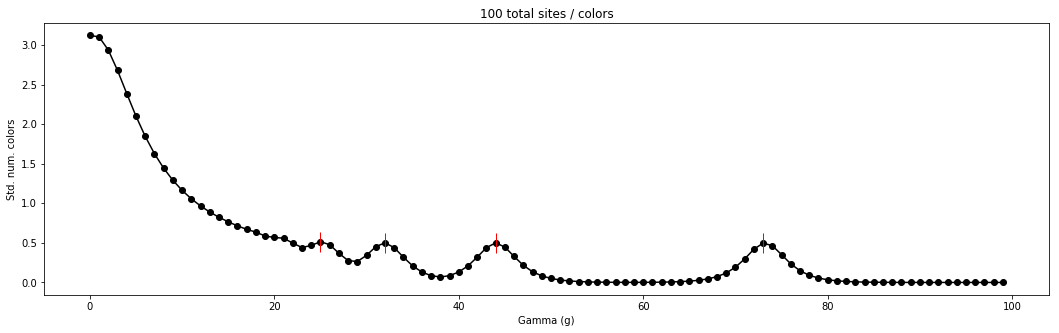

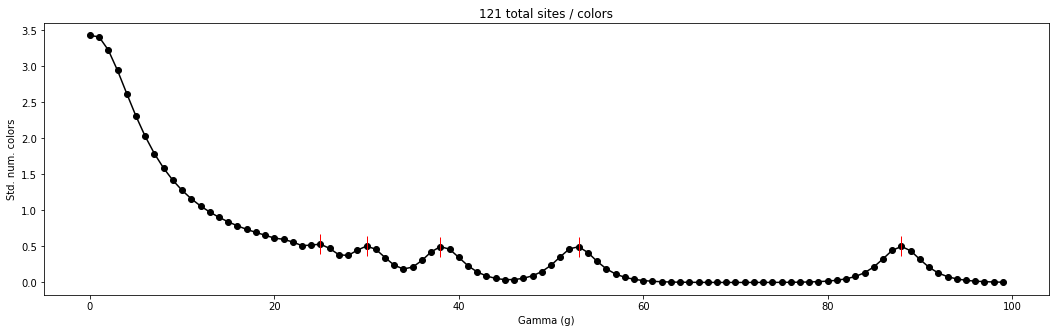

In [68]:
# plot_std_colors(9)
# plot_std_colors(16)
# plot_std_colors(25)
plot_std_colors(36)
# plot_std_colors(49)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


[0.01365924 0.60819554 1.        ]

[0.00794813 0.43965698 0.60594018 1.        ]

[0.00635133 0.34280461 0.43840883 0.60354337 1.        ]

[0.00518984 0.27779295 0.34334881 0.43635619 0.60133843 1.        ]

[0.00431965 0.28157326 0.3421621  0.43412527 0.59952256 1.        ]



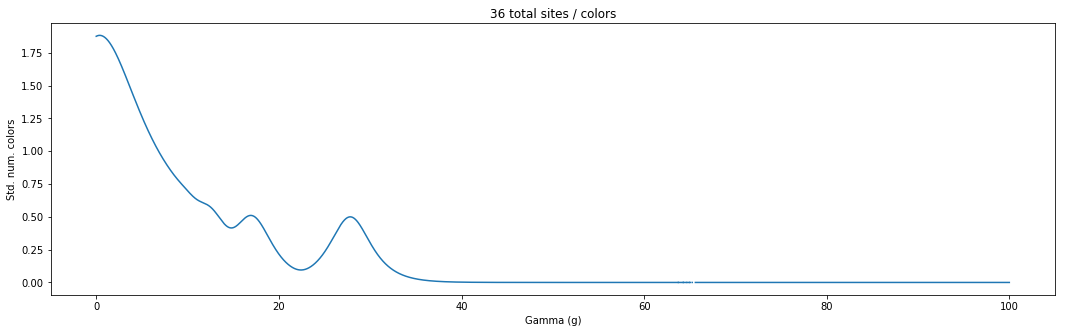

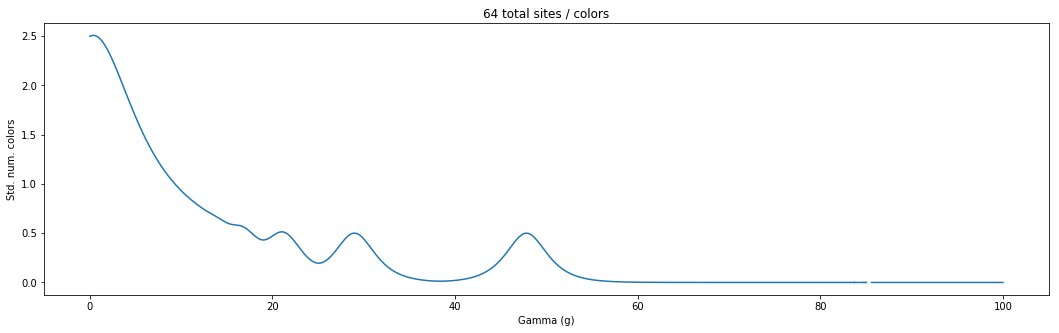

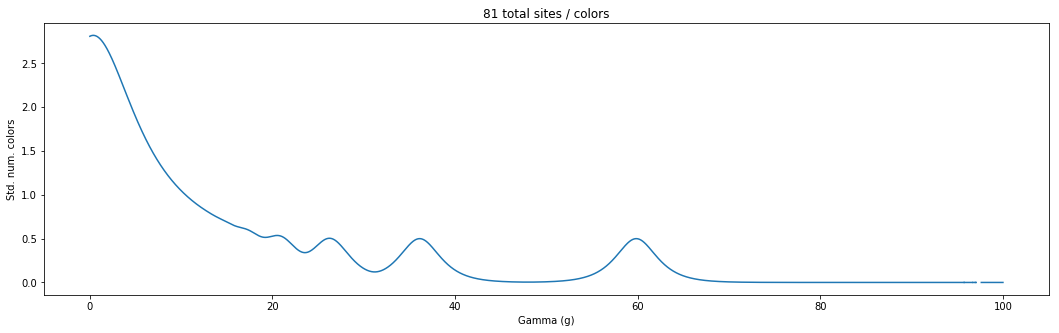

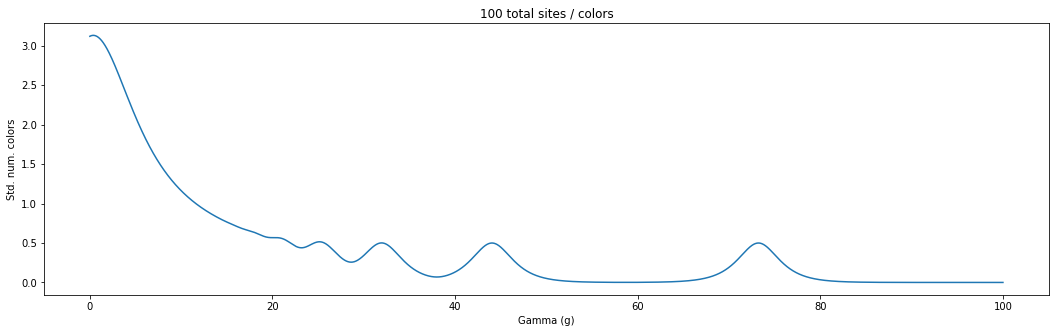

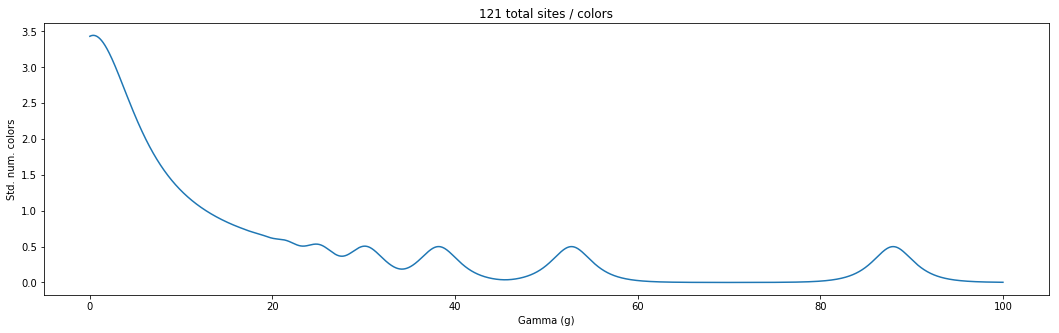

In [50]:
# plot_std_colors(9)
# plot_std_colors(16)
# plot_std_colors(25)
plot_std_colors(36)
# plot_std_colors(49)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


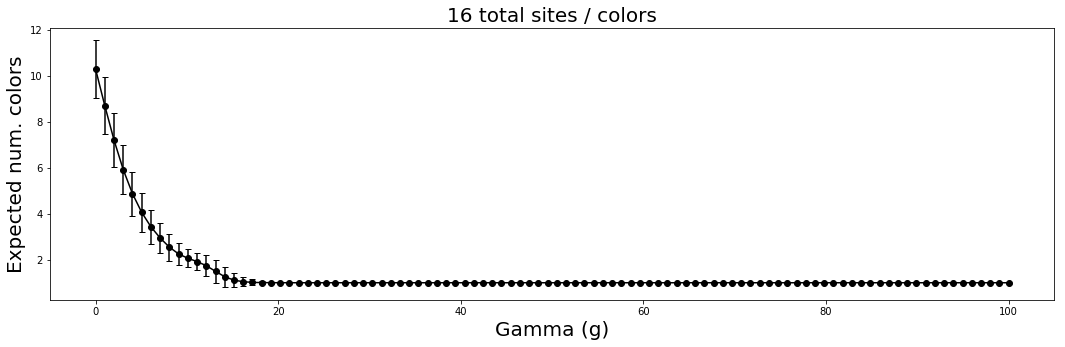

In [9]:
N = 16
# plot_expected_colors(N)
# plot_std_colors(N)
plot_avg_std_colors(N)